# KNN Classifier for Injection Molding of Bins using tsfresh data

In [1]:
import pandas as pd
import numpy as np
import my_preprocessing_functions as mpf
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
from pprint import pp
import os

In [2]:
filename = 'processed_data_pv_0.71.csv'
data_path = os.getcwd() + "/BalanceData/"
dataset_df = pd.read_csv(data_path + filename)

In [3]:
dataset_df = pd.read_csv(data_path + filename)
features = dataset_df.drop("valid_or_not", axis=1)
labels = dataset_df["valid_or_not"]
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.2)

In [4]:
print('For the training set,')
mpf.check_imbalance(y_train)
print('\nFor the test set,')
mpf.check_imbalance(y_test)

For the training set,
The imbalance profile has:
 49.02% of valid products and     
 50.98% of invalid products

For the test set,
The imbalance profile has:
 53.94% of valid products and     
 46.06% of invalid products


In [5]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [6]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))
# for i in range(1,105,2):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     #Train the model using the training sets
#     knn.fit(X_train, y_train)
#     #Predict the response for test dataset
#     y_pred = knn.predict(X_test)
#     print(“Accuracy:”,metrics.accuracy_score(y_test, y_pred), “for “,i)
#     accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

{'n_neighbors': 27}
Accuracy for our training dataset with tuning is : 77.72%


In [9]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_test, y_test)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 79.17%


/home/alfredo/.config/miniconda3/envs/ai4im/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


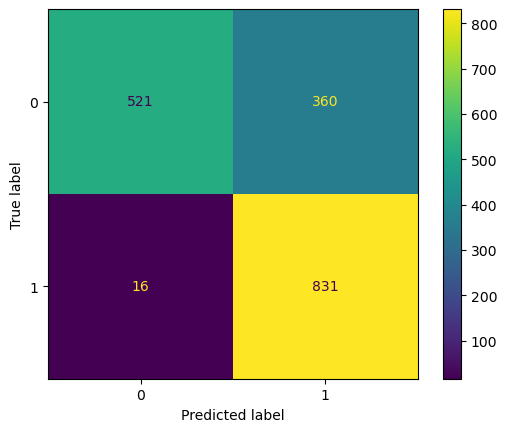

In [10]:
plot_confusion_matrix(grid, X_train, y_train, values_format='d')

/home/alfredo/.config/miniconda3/envs/ai4im/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


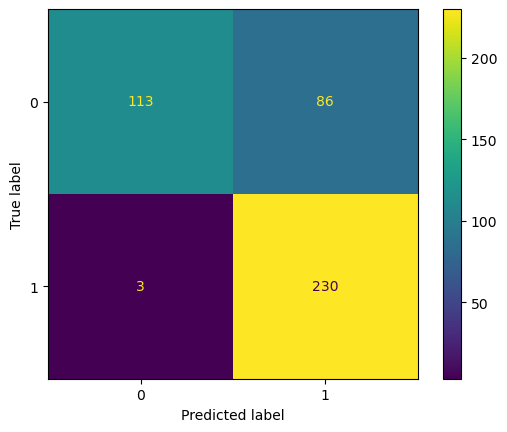

In [11]:
plot_confusion_matrix(grid, X_test, y_test, values_format='d')